In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
def CTE_EVAL(FILENAME):
    #Data you want to extract from the TMA file
    index,time,temp_soll,temp_ist,CurrentLength = [],[],[],[],[]
        
    #Opening the file and storing all lines in list b1.    
    f1 = open(FILENAME,'r')
    b1 = f1.readlines()
    f1.close() 
     
    #Identify the line numbers relevant for the data extraction        
    Anfang = b1.index('Kurvenwerte:\n')+3   
    Ende = b1.index('Resultate:\n')-3 
     
    #Go through the lines and store the data in the corresponding lists
    for k in range(len(b1)):        
        if k > Anfang and k <= Ende:
            '''Reformatting of txt-file lines --> Exchanging comma 
            with dots and split line content into pieces'''
            b1new =b1[k].replace(',','.')
            DATA = b1new.strip().split('        ') 
            
            #Storing the data to the empty lists created above
            index.append(DATA[0])
            time.append(float(DATA[1]))
            temp_ist.append(float(DATA[2]))
            temp_soll.append(float(DATA[3]))
            CurrentLength.append(float(DATA[4]))
    #The initial thickness of your specimen can be important
    
    initialthickness = CurrentLength[0]
    
    strain = []
    
    for l in CurrentLength:
        strain.append( (l-initialthickness)/initialthickness)
    
            
    return [time, temp_ist, temp_soll, CurrentLength, strain]

In [74]:
#Read the Data from the Textfile

Datafiles = ['Thickness_SH.txt','Transverse1_SH.txt','Transverse2_SH.txt']

ExperimentDATA = CTE_EVAL(Datafiles[0])
#content of ExperimentDATA is [time,temp_ist,temp_soll,CurrentLength]


#plt.plot(ExperimentDATA[0],ExperimentDATA[1])
#plt.plot(ExperimentDATA[0],ExperimentDATA[2],'r--')

#length
#plt.plot(ExperimentDATA[0],ExperimentDATA[3],'r--')

#strain
#plt.plot(ExperimentDATA[0],ExperimentDATA[4],'r--')
#plt.show(True)

In [75]:
#Temperature ranges you want to evaluate
Tu = 140.0
Tl = 50.0

#Identifying the corresponding list indices
Temp_soll = ExperimentDATA[2]

upper = Temp_soll.index(Tu)
lower = Temp_soll.index(Tl)


print()
   
#print(lower,upper)
    

In [76]:
'''Data set extraction!
Remeber: content of ExperimentDATA  
is [time,temp_ist,temp_soll,CurrentLength,strain]'''

time = ExperimentDATA[0][lower:upper]
tempist = ExperimentDATA[1][lower:upper]
tempsoll = ExperimentDATA[2][lower:upper]
strain = ExperimentDATA[4][lower:upper]


    

In [77]:
def func(x, m, b):
    return m * x + b 

#Parametric quadratic function
#def funcquad(x, a, b ,c ):
#    return a * x**2 + b*x + c

#That's all you need for simple curve-fitting tasks
from scipy.optimize import curve_fit


x  = tempist
y  = strain

popt, pcov = curve_fit(func, x, y)
    
    #print(popt)
CTE = popt[0]*1.0e6
Fittedeps = func(np.asarray(x),*popt)

print('The CTE is %4.2f ppm/K' % (CTE))
    


The CTE is 66.47 ppm/K


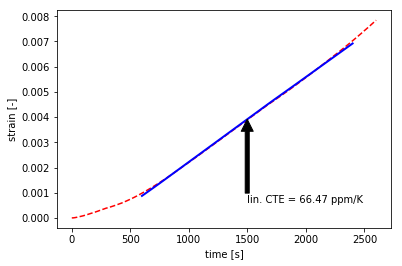

In [78]:
plt.plot(ExperimentDATA[0],ExperimentDATA[4],'r--')
plt.plot(time,Fittedeps,'b',linewidth=2.0)

middleindex = int(len(Fittedeps) / 2) - 1

plt.annotate('lin. CTE = %4.2f ppm/K'%(CTE), xy=(time[middleindex], Fittedeps[middleindex]), xytext=(time[middleindex], 0.15*Fittedeps[middleindex]),
            arrowprops=dict(facecolor='black', shrink=0.00),
            )

plt.xlabel('time [s]')
plt.ylabel('strain [-]')
plt.show(True)